In [1]:
# import os
# os.chdir('C:/Users/user/Desktop/빅콘테스트')

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
from numpy import nan as NA
from datetime import datetime
import matplotlib.pyplot as plt

data = pd.read_excel('수산Biz_데이터.xlsx')
salmon = data[data["P_NAME"] == '연어']
squid = data[data["P_NAME"] == '오징어']
white_shrimp = data[data["P_NAME"] == '흰다리새우']


def get_outlier(df=None, column=None, weight=1.5):
  # target 값과 상관관계가 높은 열을 우선적으로 진행
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)

    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
  
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
  
    outlier_idx = df[column][ (df[column] < lowest) | (df[column] > highest) ].index
    return outlier_idx

# 함수 사용해서 이상치 값 삭제
outlier_idx = get_outlier(df=salmon, column='P_PRICE', weight=1.5)
salmon.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=squid, column='P_PRICE', weight=1.5)
squid.drop(outlier_idx, axis=0, inplace=True)
outlier_idx = get_outlier(df=white_shrimp, column='P_PRICE', weight=1.5)
white_shrimp.drop(outlier_idx, axis=0, inplace=True)

salmon['REG_DATE']=pd.to_datetime(salmon['REG_DATE'], format='%Y-%m-%d')
a= salmon.groupby(salmon['REG_DATE']).mean()
salmon = pd.merge(salmon, a, on='REG_DATE', how='left')
salmon.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)
salmon.rename(columns={'P_PRICE_y':'MEAN_PRICE'}, inplace=True)
salmon['DAY'] = salmon['REG_DATE'].dt.month
a = salmon.groupby(salmon['REG_DATE'].dt.strftime("%m")).mean()
del a['MEAN_PRICE']
a.rename(columns={'P_PRICE':'M_MEAN_PRICE'}, inplace=True)
salmon = pd.merge(salmon, a, on='DAY', how='left')
salmon.head()
b= salmon['P_PRICE'].groupby(salmon['P_IMPORT_TYPE']).mean()
salmon = pd.merge(salmon, b, on='P_IMPORT_TYPE', how='left')
salmon.rename(columns={'P_PRICE_y':'IMPORT_MEAN_PRICE'}, inplace=True)
salmon.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)

C:\Users\GaeJu\anaconda3\lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(
<ipython-input-2-9e9a0668591e>:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  salmon['REG_DATE']=pd.to_datetime(salmon['REG_DATE'], format='%Y-%m-%d')


In [3]:
c= salmon['P_PRICE'].groupby(salmon['REG_DATE']).median()
salmon = pd.merge(salmon, c, on='REG_DATE', how='left')
salmon.rename(columns={'P_PRICE_y':'MEDIAN'}, inplace=True)
salmon.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)

In [4]:
salmon.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,MEAN_PRICE,DAY,M_MEAN_PRICE,IMPORT_MEAN_PRICE,MEDIAN
0,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F)",12.936815,13.287212,12,12.773497,14.569838,12.936815
1,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,포장횟감,필렛(F)",19.146755,13.287212,12,12.773497,18.819085,12.936815
2,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,"냉장,필렛(F),횟감",12.082384,13.287212,12,12.773497,14.822066,12.936815
3,2015-12-28,수산물,노르웨이,노르웨이,자사제품제조용,어류,연어,연어,"냉장,필렛(F)",13.425826,13.287212,12,12.773497,14.569838,12.936815
4,2015-12-28,수산물,노르웨이,노르웨이,판매용,어류,연어,연어,냉장,8.844281,13.287212,12,12.773497,10.262783,12.936815


In [5]:
squid['REG_DATE']=pd.to_datetime(squid['REG_DATE'], format='%Y-%m-%d')
a= squid.groupby(squid['REG_DATE']).mean()
squid = pd.merge(squid, a, on='REG_DATE', how='left')
squid.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)
squid.rename(columns={'P_PRICE_y':'MEAN_PRICE'}, inplace=True)
squid['DAY'] = squid['REG_DATE'].dt.month
a = squid.groupby(squid['REG_DATE'].dt.strftime("%m")).mean()
del a['MEAN_PRICE']
a.rename(columns={'P_PRICE':'M_MEAN_PRICE'}, inplace=True)
squid = pd.merge(squid, a, on='DAY', how='left')
squid.head()
b= squid['P_PRICE'].groupby(squid['P_IMPORT_TYPE']).mean()
squid = pd.merge(squid, b, on='P_IMPORT_TYPE', how='left')
squid.rename(columns={'P_PRICE_y':'IMPORT_MEAN_PRICE'}, inplace=True)
squid.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)

<ipython-input-5-69575741f633>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  squid['REG_DATE']=pd.to_datetime(squid['REG_DATE'], format='%Y-%m-%d')


In [6]:
squid.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,MEAN_PRICE,DAY,M_MEAN_PRICE,IMPORT_MEAN_PRICE
0,2015-12-28,수산물,대만,대만,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",1.989999,1.741647,12,2.613154,2.110168
1,2015-12-28,수산물,중국,중국,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체",0.793729,1.741647,12,2.613154,2.110168
2,2015-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",1.233434,1.741647,12,2.613154,1.753472
3,2015-12-28,수산물,페루,페루,판매용,연체류 해물모듬,오징어,오징어,"냉동,동체,자숙",5.481140,1.741647,12,2.613154,4.492923
4,2015-12-28,수산물,칠레,칠레,판매용,연체류 해물모듬,오징어,오징어,"냉동,다리",0.968083,1.741647,12,2.613154,1.753472


In [7]:
white_shrimp['REG_DATE']=pd.to_datetime(white_shrimp['REG_DATE'], format='%Y-%m-%d')
a= white_shrimp.groupby(white_shrimp['REG_DATE']).mean()
white_shrimp = pd.merge(white_shrimp, a, on='REG_DATE', how='left')
white_shrimp.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)
white_shrimp.rename(columns={'P_PRICE_y':'MEAN_PRICE'}, inplace=True)
white_shrimp['DAY'] = white_shrimp['REG_DATE'].dt.month
a = white_shrimp.groupby(white_shrimp['REG_DATE'].dt.strftime("%m")).mean()
del a['MEAN_PRICE']
a.rename(columns={'P_PRICE':'M_MEAN_PRICE'}, inplace=True)
white_shrimp = pd.merge(white_shrimp, a, on='DAY', how='left')
white_shrimp.head()
b= white_shrimp['P_PRICE'].groupby(white_shrimp['P_IMPORT_TYPE']).mean()
white_shrimp = pd.merge(white_shrimp, b, on='P_IMPORT_TYPE', how='left')
white_shrimp.rename(columns={'P_PRICE_y':'IMPORT_MEAN_PRICE'}, inplace=True)
white_shrimp.rename(columns={'P_PRICE_x':'P_PRICE'}, inplace=True)

<ipython-input-7-7be9d3c7c59a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  white_shrimp['REG_DATE']=pd.to_datetime(white_shrimp['REG_DATE'], format='%Y-%m-%d')


In [8]:
white_shrimp.head()

,REG_DATE,P_TYPE,CTRY_1,CTRY_2,P_PURPOSE,CATEGORY_1,CATEGORY_2,P_NAME,P_IMPORT_TYPE,P_PRICE,MEAN_PRICE,DAY,M_MEAN_PRICE,IMPORT_MEAN_PRICE
0,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",7.202863,9.227891,12,9.498164,9.678774
1,2015-12-28,수산물,중국,중국,판매용,갑각류,새우,흰다리새우,"냉동,살",6.972132,9.227891,12,9.498164,9.211613
2,2015-12-28,수산물,페루,페루,판매용,갑각류,새우,흰다리새우,냉동,6.100000,9.227891,12,9.498164,7.404033
3,2015-12-28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살,자숙",13.377047,9.227891,12,9.498164,9.678774
4,2015-12-28,수산물,태국,태국,판매용,갑각류,새우,흰다리새우,"냉동,살",15.050566,9.227891,12,9.498164,9.211613


In [9]:
# metadata = pd.concat([salmon, squid, white_shrimp])

from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()
salmon['P_IMPORT_TYPE']=lb.fit_transform(salmon['P_IMPORT_TYPE'])
salmon['P_PURPOSE']=lb.fit_transform(salmon['P_PURPOSE'])
salmon['CTRY_1']=lb.fit_transform(salmon['CTRY_1'])
salmon['CTRY_2']=lb.fit_transform(salmon['CTRY_2'])
salmon['CATEGORY_1']=lb.fit_transform(salmon['CATEGORY_1'])
salmon['CATEGORY_2']=lb.fit_transform(salmon['CATEGORY_2'])
salmon['P_NAME']=lb.fit_transform(salmon['P_NAME'])
salmon['P_TYPE']=lb.fit_transform(salmon['P_TYPE'])
salmon['MEAN_PRICE']=salmon['MEAN_PRICE'].apply(lambda x:round(x,3))
salmon['M_MEAN_PRICE']=salmon['M_MEAN_PRICE'].apply(lambda x:round(x,3))
salmon['P_PRICE']=salmon['P_PRICE'].apply(lambda x:round(x,3))
salmon['IMPORT_MEAN_PRICE']=salmon['IMPORT_MEAN_PRICE'].apply(lambda x:round(x,3))

squid['P_IMPORT_TYPE']=lb.fit_transform(squid['P_IMPORT_TYPE'])
squid['P_PURPOSE']=lb.fit_transform(squid['P_PURPOSE'])
squid['CTRY_1']=lb.fit_transform(squid['CTRY_1'])
squid['CTRY_2']=lb.fit_transform(squid['CTRY_2'])
squid['CATEGORY_1']=lb.fit_transform(squid['CATEGORY_1'])
squid['CATEGORY_2']=lb.fit_transform(squid['CATEGORY_2'])
squid['P_NAME']=lb.fit_transform(squid['P_NAME'])
squid['P_TYPE']=lb.fit_transform(squid['P_TYPE'])
squid['MEAN_PRICE']=squid['MEAN_PRICE'].apply(lambda x:round(x,3))
squid['M_MEAN_PRICE']=squid['M_MEAN_PRICE'].apply(lambda x:round(x,3))
squid['P_PRICE']=squid['P_PRICE'].apply(lambda x:round(x,3))
squid['IMPORT_MEAN_PRICE']=squid['IMPORT_MEAN_PRICE'].apply(lambda x:round(x,3))

white_shrimp['P_IMPORT_TYPE']=lb.fit_transform(white_shrimp['P_IMPORT_TYPE'])
white_shrimp['P_PURPOSE']=lb.fit_transform(white_shrimp['P_PURPOSE'])
white_shrimp['CTRY_1']=lb.fit_transform(white_shrimp['CTRY_1'])
white_shrimp['CTRY_2']=lb.fit_transform(white_shrimp['CTRY_2'])
white_shrimp['CATEGORY_1']=lb.fit_transform(white_shrimp['CATEGORY_1'])
white_shrimp['CATEGORY_2']=lb.fit_transform(white_shrimp['CATEGORY_2'])
white_shrimp['P_NAME']=lb.fit_transform(white_shrimp['P_NAME'])
white_shrimp['P_TYPE']=lb.fit_transform(white_shrimp['P_TYPE'])
white_shrimp['MEAN_PRICE']=white_shrimp['MEAN_PRICE'].apply(lambda x:round(x,3))
white_shrimp['M_MEAN_PRICE']=white_shrimp['M_MEAN_PRICE'].apply(lambda x:round(x,3))
white_shrimp['P_PRICE']=white_shrimp['P_PRICE'].apply(lambda x:round(x,3))
white_shrimp['IMPORT_MEAN_PRICE']=white_shrimp['IMPORT_MEAN_PRICE'].apply(lambda x:round(x,3))

salmon = salmon.drop_duplicates(['REG_DATE'])
squid = squid.drop_duplicates(['REG_DATE'])
white_shrimp = white_shrimp.drop_duplicates(['REG_DATE'])

In [10]:
#var= ['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME','P_IMPORT_TYPE','P_PRICE','MEAN_PRICE','DAY','M_MEAN_PRICE','IMPORT_MEAN_PRICE']
var1= ['REG_DATE','MEAN_PRICE']
x = salmon[var1]
x.index = x['REG_DATE']
x.set_index('REG_DATE', inplace=True)

In [11]:
x

,MEAN_PRICE
REG_DATE,
2015-12-28,13.287
2016-01-04,12.332
2016-01-11,12.877
2016-01-18,13.387
2016-01-25,12.644
...,...
2019-12-02,11.804
2019-12-09,13.609
2019-12-16,14.339


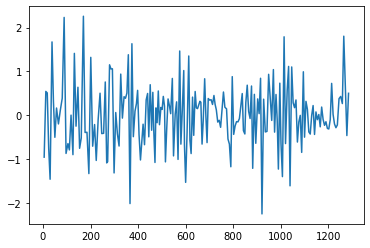

In [12]:
dff_1 = salmon['MEAN_PRICE'].diff().dropna()
plt.plot(dff_1)
plt.show()

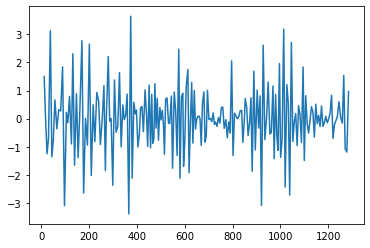

In [13]:
dff_2 = dff_1.diff().dropna()
plt.plot(dff_2)
plt.show()

pip install pmdarima

In [14]:
import pmdarima as pmd
from pmdarima import auto_arima
auto_arima(x.MEAN_PRICE, seasonal=False,trace=True,supress_warnings=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=448.780, Time=0.25 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=463.440, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=449.813, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=445.479, Time=0.03 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=461.450, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=445.509, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=446.095, Time=0.06 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=447.671, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=443.511, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=443.533, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=444.128, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=447.836, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=445.704, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.783 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [15]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 0, 차분 =1, MA=1) 파라미터로 ARIMA 모델을 학습한다.
model = ARIMA(x.MEAN_PRICE.values, order = (0,1,1))
model_fit = model.fit(trend = 'c', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  209
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -219.739
Method:                       css-mle   S.D. of innovations              0.692
Date:                Fri, 10 Sep 2021   AIC                            445.479
Time:                        00:55:59   BIC                            455.506
Sample:                             1   HQIC                           449.533
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0056      0.032      0.179      0.858      -0.056       0.067
ma.L1.D.y     -0.3435      0.072     -4.752      0.000      -0.485      -0.202
                                    Roots           

In [16]:
model = ARIMA(x.MEAN_PRICE.values, order = (0,1,1))
model_fit = model.fit(trend = 'nc', full_output = True, disp = True)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  209
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -219.755
Method:                       css-mle   S.D. of innovations              0.692
Date:                Fri, 10 Sep 2021   AIC                            443.511
Time:                        00:55:59   BIC                            450.196
Sample:                             1   HQIC                           446.214
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.3433      0.072     -4.749      0.000      -0.485      -0.202
                                    Roots                                    
                  Real          Imaginary           M

C:\Users\GaeJu\anaconda3\lib\site-packages\statsmodels\base\model.py:567: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn("Maximum Likelihood optimization failed to converge. "


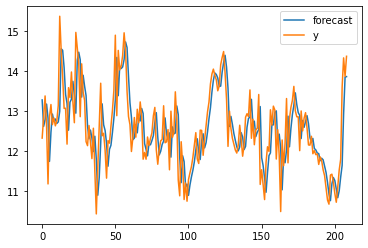

In [17]:
fig = model_fit.plot_predict()

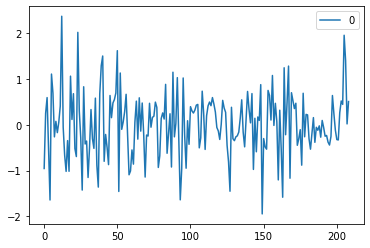

In [18]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [19]:
preds = model_fit.predict(2, 210, typ='levels')
print(preds)

[12.62529481 12.79164711 13.1829031  12.82898075 11.74938806 12.47805709
 12.93376069 12.76055238 12.81009788 12.69774007 12.737312   13.00700562
 14.5659777  14.52987454 14.09325984 13.42458148 13.1976425  12.53002623
 13.22872435 13.30573778 13.75245738 13.41133629 12.95537443 14.28295037
 14.48130254 14.29526135 13.35799687 13.9043628  13.62897255 13.39586657
 12.63945036 12.31343769 12.53248384 12.33384653 11.99575333 12.37876404
 11.797094   10.9026241  11.3520451  12.20045554 13.18847085 12.66412514
 12.52548193 12.2007619  11.62894358 12.04991722 12.15241481 12.46603896
 12.82850479 13.28588438 14.3504505  13.39336119 14.13715077 14.07203971
 14.11207156 14.29983715 14.73795455 14.5974533  13.88005304 13.21742067
 12.85662307 12.29211947 12.3294722  12.66932616 12.46356883 12.85129751
 12.76047929 13.07340441 12.94639818 12.19619975 12.0496273  11.88832696
 12.19741199 12.1629937  12.26938119 12.39390146 12.7196831  12.9694324
 12.35711584 11.91114906 12.0029874  12.17373439 12.

In [20]:
forecast_data = model_fit.forecast(steps=455) 

pred = x[50:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = pred.MEAN_PRICE.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)

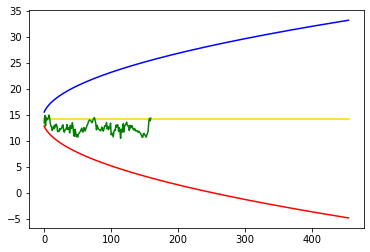

In [21]:
# 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [22]:
date=pd.date_range('2021-01-04','2021-06-28', freq='W-MON')
date

DatetimeIndex(['2021-01-04', '2021-01-11', '2021-01-18', '2021-01-25',
               '2021-02-01', '2021-02-08', '2021-02-15', '2021-02-22',
               '2021-03-01', '2021-03-08', '2021-03-15', '2021-03-22',
               '2021-03-29', '2021-04-05', '2021-04-12', '2021-04-19',
               '2021-04-26', '2021-05-03', '2021-05-10', '2021-05-17',
               '2021-05-24', '2021-05-31', '2021-06-07', '2021-06-14',
               '2021-06-21', '2021-06-28'],
              dtype='datetime64[ns]', freq='W-MON')

In [23]:
x

,MEAN_PRICE
REG_DATE,
2015-12-28,13.287
2016-01-04,12.332
2016-01-11,12.877
2016-01-18,13.387
2016-01-25,12.644
...,...
2019-12-02,11.804
2019-12-09,13.609
2019-12-16,14.339


In [24]:
# forecast dataframe
forcast_df1 = pd.DataFrame({'Date':date,
                           '예측단가($)':preds[183:]}) 

# set datatype to datetime format
forcast_df1['Date']=pd.to_datetime(forcast_df1['Date'], infer_datetime_format=True)

# set Date column as index
forcast_df1 = forcast_df1.set_index('Date')
forcast_df1

,예측단가($)
Date,
2021-01-04,12.220494
2021-01-11,12.323926
2021-01-18,12.072463
2021-01-25,12.036698
2021-02-01,11.958751
2021-02-08,11.943811
2021-02-15,11.765973
2021-02-22,11.828376
2021-03-01,11.789385


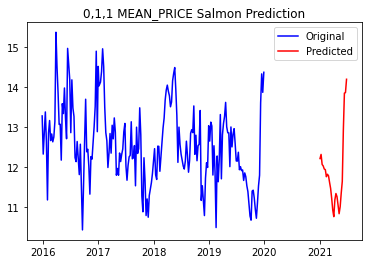

In [25]:
# Prediction Plotting

orgi = plt.plot(x, color='b', label='Original')
predi = plt.plot(forcast_df1, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('0,1,1 MEAN_PRICE Salmon Prediction')
plt.show(block=False)

### 오징어

In [26]:
#var= ['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME','P_IMPORT_TYPE','P_PRICE','MEAN_PRICE','DAY','M_MEAN_PRICE','IMPORT_MEAN_PRICE']
var1= ['REG_DATE','MEAN_PRICE']
y = squid[var1]
y.index = y['REG_DATE']
y.set_index('REG_DATE', inplace=True)
y

,MEAN_PRICE
REG_DATE,
2015-12-28,1.742
2016-01-04,1.787
2016-01-11,1.346
2016-01-18,1.675
2016-01-25,2.186
...,...
2019-12-02,2.439
2019-12-09,2.886
2019-12-16,2.770


In [27]:
# import pmdarima as pmd
# from pmdarima import auto_arima
auto_arima(y.MEAN_PRICE.values, seasonal=False,trace=True,supress_warnings=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=110.032, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=194.110, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=160.995, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=109.186, Time=0.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=192.158, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=110.097, Time=0.12 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=109.640, Time=0.10 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=109.414, Time=0.22 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=108.130, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=109.163, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=108.738, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=159.105, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=108.464, Time=0.06 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 0.909 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [28]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 0, 차분 =1, MA=1) 파라미터로 ARIMA 모델을 학습한다.
model2 = ARIMA(y.MEAN_PRICE.values, order = (0,1,1))
model2_fit = model2.fit(trend = 'c', full_output = True, disp = True)
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  207
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -51.593
Method:                       css-mle   S.D. of innovations              0.310
Date:                Fri, 10 Sep 2021   AIC                            109.186
Time:                        00:56:01   BIC                            119.184
Sample:                             1   HQIC                           113.229
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.005      0.985      0.325      -0.005       0.014
ma.L1.D.y     -0.7822      0.049    -16.022      0.000      -0.878      -0.686
                                    Roots           

In [29]:
model2 = ARIMA(y.MEAN_PRICE.values, order = (0,1,1))
model2_fit = model2.fit(trend = 'nc', full_output = True, disp = True)
print(model2_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  207
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 -52.065
Method:                       css-mle   S.D. of innovations              0.310
Date:                Fri, 10 Sep 2021   AIC                            108.130
Time:                        00:56:01   BIC                            114.796
Sample:                             1   HQIC                           110.826
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.7746      0.048    -16.020      0.000      -0.869      -0.680
                                    Roots                                    
                  Real          Imaginary           M

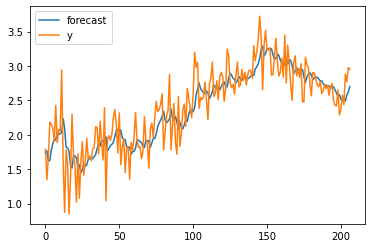

In [30]:
fig = model2_fit.plot_predict()

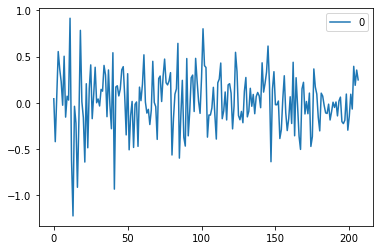

In [31]:
residuals = pd.DataFrame(model2_fit.resid)
residuals.plot()

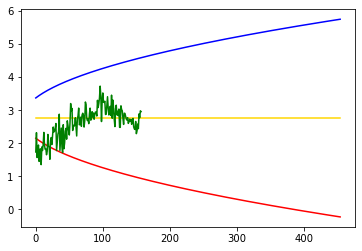

In [32]:
forecast_data = model2_fit.forecast(steps=455) 

pred = y[50:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = pred.MEAN_PRICE.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
    # 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [33]:
y

,MEAN_PRICE
REG_DATE,
2015-12-28,1.742
2016-01-04,1.787
2016-01-11,1.346
2016-01-18,1.675
2016-01-25,2.186
...,...
2019-12-02,2.439
2019-12-09,2.886
2019-12-16,2.770


In [34]:
preds = model2_fit.predict(2, 211, typ='levels')
print(preds)

[1.76521461 1.61107656 1.63040083 1.77983298 1.87237955 1.92779577
 1.92198754 2.03848327 2.00340253 2.01990417 2.02694892 2.23406693
 2.09516726 1.81936498 1.81116215 1.76151313 1.55576312 1.51500912
 1.69197957 1.69514026 1.65949061 1.51533159 1.5621455  1.45278144
 1.48754611 1.58029784 1.54190859 1.56109024 1.64808353 1.64851555
 1.65809256 1.65063271 1.68362738 1.7123402  1.80378558 1.87191191
 1.83834362 1.91874246 1.9129395  1.85005989 1.97245152 1.76225474
 1.80119564 1.84308037 1.86019446 1.8939642  1.97467399 2.06311362
 2.07976937 2.00182472 2.07309815 1.95878616 1.92772588 1.93139445
 1.82287668 1.81952312 1.82188486 1.71596162 1.75451775 1.76003663
 1.80556398 1.92288265 1.92516334 1.9003299  1.88470129 1.83201946
 1.81465744 1.91617537 1.91748838 1.90836134 1.8194629  1.87909586
 1.94467258 1.94812775 2.01369728 2.12061641 2.16984527 2.21383779
 2.2672998  2.34117123 2.21421902 2.17607303 2.19747183 2.23185531
 2.37706086 2.24246913 2.21260743 2.26769933 2.18390945 2.0786

In [35]:
date=pd.date_range('2021-01-04','2021-06-28', freq='W-MON')
# forecast dataframe
forcast_df2 = pd.DataFrame({'Date':date,
                           '예측단가($)':preds[184:]}) 
# set datatype to datetime format
forcast_df2['Date']=pd.to_datetime(forcast_df2['Date'], infer_datetime_format=True)

# set Date column as index
forcast_df2 = forcast_df2.set_index('Date')

forcast_df2

,예측단가($)
Date,
2021-01-04,2.811035
2021-01-11,2.785328
2021-01-18,2.782324
2021-01-25,2.740773
2021-02-01,2.719183
2021-02-08,2.720945
2021-02-15,2.709912
2021-02-22,2.712186
2021-03-01,2.680585


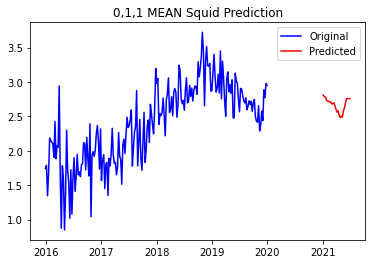

In [36]:
# Prediction Plotting

orgi = plt.plot(y, color='b', label='Original')
predi = plt.plot(forcast_df2, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('0,1,1 MEAN Squid Prediction')
plt.show(block=False)

## White Shrimp

In [37]:
#var= ['REG_DATE','CTRY_1','CTRY_2','P_PURPOSE','CATEGORY_1','CATEGORY_2','P_NAME','P_IMPORT_TYPE','P_PRICE','MEAN_PRICE','DAY','M_MEAN_PRICE','IMPORT_MEAN_PRICE']
var1= ['REG_DATE','MEAN_PRICE']
z = white_shrimp[var1]
z.index = z['REG_DATE']
z.set_index('REG_DATE', inplace=True)
z

,MEAN_PRICE
REG_DATE,
2015-12-28,9.228
2016-01-04,9.279
2016-01-11,9.846
2016-01-18,9.309
2016-01-25,8.813
...,...
2019-12-02,9.615
2019-12-09,9.524
2019-12-16,9.749


In [38]:
# import pmdarima as pmd
# from pmdarima import auto_arima
auto_arima(z.MEAN_PRICE.values, seasonal=False,trace=True,supress_warnings=False)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=408.727, Time=0.31 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=517.749, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=469.250, Time=0.02 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=403.817, Time=0.06 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=515.749, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=405.093, Time=0.06 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=405.074, Time=0.17 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=406.749, Time=0.18 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=401.848, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=403.134, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=403.115, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=467.250, Time=0.01 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=404.787, Time=0.09 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 1.074 seconds


ARIMA(order=(0, 1, 1), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm

# (AR = 0, 차분 =1, MA=1) 파라미터로 ARIMA 모델을 학습한다.
model3 = ARIMA(z.MEAN_PRICE.values, order = (0,1,1))
model3_fit = model3.fit(trend = 'c', full_output = True, disp = True)
print(model3_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  209
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -198.908
Method:                       css-mle   S.D. of innovations              0.624
Date:                Fri, 10 Sep 2021   AIC                            403.817
Time:                        00:56:02   BIC                            413.844
Sample:                             1   HQIC                           407.871
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.004     -0.176      0.860      -0.008       0.006
ma.L1.D.y     -0.9221      0.029    -32.305      0.000      -0.978      -0.866
                                    Roots           

In [40]:
model3 = ARIMA(z.MEAN_PRICE.values, order = (0,1,1))
model3_fit = model3.fit(trend = 'nc', full_output = True, disp = True)
print(model3_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  209
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -198.924
Method:                       css-mle   S.D. of innovations              0.624
Date:                Fri, 10 Sep 2021   AIC                            401.848
Time:                        00:56:02   BIC                            408.532
Sample:                             1   HQIC                           404.550
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1.D.y     -0.9215      0.028    -32.349      0.000      -0.977      -0.866
                                    Roots                                    
                  Real          Imaginary           M

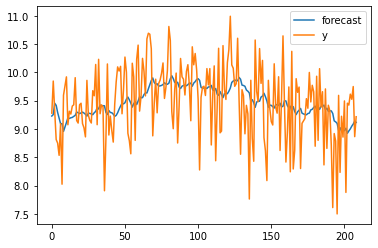

In [41]:
fig = model3_fit.plot_predict()

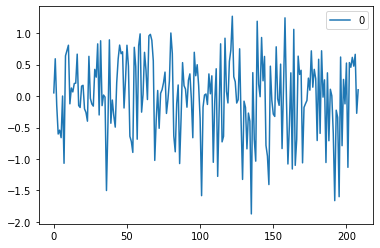

In [42]:
residuals = pd.DataFrame(model3_fit.resid)
residuals.plot()

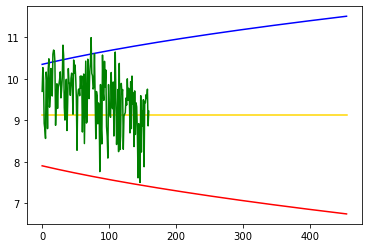

In [43]:
forecast_data = model3_fit.forecast(steps=455) 

pred = z[50:]

# 마지막 5일의 예측 데이터 (2021-04-15 ~ 2021-04-19)
pred_y = forecast_data[0].tolist()

# 실제 5일의 데이터 (2021-04-15 ~ 2021-04-19)
test_y = pred.MEAN_PRICE.values

# 마지막 5일의 예측 데이터 최소값
pred_y_lower = []
# 마지막 5일의 예측 데이터 최대값
pred_y_upper = []

for lower_upper in forecast_data[2]:
    lower = lower_upper[0]
    upper = lower_upper[1]
    pred_y_lower.append(lower)
    pred_y_upper.append(upper)
    
    # 모델이 예측한 가격 그래프
plt.plot(pred_y, color = 'gold')

# 모델이 예측한 최저 가격 그래프
plt.plot(pred_y_lower, color = 'red')

# 모델이 예측한 최고 가격 그래프
plt.plot(pred_y_upper, color = 'blue')

# 실제 가격 그래프
plt.plot(test_y, color = 'green')

In [44]:
preds = model3_fit.predict(1, 210, typ='levels')
print(preds)

[9.228      9.25358491 9.45324207 9.4163466  9.29090954 9.19516888
 9.09272427 9.09276264 8.95674933 9.03225912 9.11245177 9.197451
 9.18502331 9.19742985 9.2035866  9.22181017 9.24013554 9.29845446
 9.28549356 9.27007716 9.28333215 9.29751229 9.28074828 9.25942614
 9.22696628 9.27797804 9.27500217 9.26490045 9.25212247 9.28590251
 9.30976244 9.37556237 9.35175286 9.42122521 9.40919828 9.41044544
 9.40914861 9.29086039 9.25496196 9.3252499  9.29124449 9.28627092
 9.26164328 9.22284658 9.23959489 9.2860546  9.34967158 9.40255034
 9.45778782 9.44288653 9.4627581  9.5261287  9.56356194 9.51336061
 9.45666275 9.38636522 9.44716165 9.48411388 9.43026774 9.49302935
 9.57056226 9.55050681 9.55258586 9.60707929 9.63948252 9.63512866
 9.71013793 9.78710785 9.856625   9.90051973 9.82028183 9.79067632
 9.79760711 9.75738273 9.76080538 9.76874612 9.78548011 9.81533941
 9.79365515 9.78913097 9.80787492 9.88651119 9.93959492 9.88987707
 9.82036281 9.81099648 9.82480737 9.74062486 9.71366084 9.755354

In [45]:
date=pd.date_range('2021-01-04','2021-06-28', freq='W-MON')
# forecast dataframe
forcast_df3 = pd.DataFrame({'Date':date,
                           '예측단가($)':preds[184:]}) 
# set datatype to datetime format
forcast_df3['Date']=pd.to_datetime(forcast_df3['Date'], infer_datetime_format=True)

# set Date column as index
forcast_df3 = forcast_df3.set_index('Date')

forcast_df3

,예측단가($)
Date,
2021-01-04,9.402235
2021-01-11,9.400882
2021-01-18,9.421058
2021-01-25,9.338190
2021-02-01,9.367130
2021-02-08,9.311407
2021-02-15,9.319850
2021-02-22,9.320097
2021-03-01,9.273086


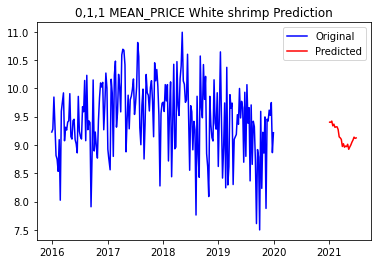

In [46]:
# Prediction Plotting

orgi = plt.plot(z, color='b', label='Original')
predi = plt.plot(forcast_df3, color='r', label='Predicted')
plt.legend(loc='best')
plt.title('0,1,1 MEAN_PRICE White shrimp Prediction')
plt.show(block=False)

In [55]:
# 소수점 셋째자리까지 반올림
forcast_df1 = round(forcast_df1, 3)
forcast_df2 = round(forcast_df2, 3)
forcast_df3 = round(forcast_df3, 3)

In [56]:
from openpyxl import load_workbook
wb = load_workbook('수산Biz_평가데이터.xlsx')
ws = wb.active
for i in range(1, 27):
    ws.cell(i+1,4).value = forcast_df2['예측단가($)'][i-1]
    ws.cell(i+1,9).value = forcast_df1['예측단가($)'][i-1]
    ws.cell(i+1,14).value = forcast_df3['예측단가($)'][i-1]
wb.save('test.xlsx')